<a href="https://colab.research.google.com/github/dibyansu24-maker/Histify/blob/main/Histify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histify - Sequence-based multiple Histidine function prediction

## Importing Libraries

In [1]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np

## Data Preprocessing

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df

,EntryID,Sequence,Mod Sequence,PTM,Residue No.,Modification
0,O19069,MTAALVAAPAAATMASGSSGLAAARLLSRSFLLQQNGIRHCSYTAS...,PPGRRMGHAGAIIAG,Active site,299.0,Acetylation
1,O60825,MSGASSSEQNNNSYETKTPNLRMSEKKCSWASYMTNSPTLIVMIGL...,RTIYLCRHGESEFNL,Active site,257.0,Acetylation
2,P07738,MSKYKLIMLRHGEGAWNKENRFCSWVDQKLNSEGMEEARNCGKQLK...,YKLIMLRHGEGAWNK,Active site,11.0,Acetylation
3,P07952,MSKYKLIMLRHGEGAWNKENRFCSWVDQKLNSEGMEEARNCGKQLK...,YKLIMLRHGEGAWNK,Active site,11.0,Acetylation
4,P07953,MSREMGELTQTRLQKIWIPHSSSSSVLQRRRGSSIPQFTNSPTMVI...,RSIYLCRHGESELNL,Active site,259.0,Acetylation
...,...,...,...,...,...,...
1579,K7R7F6,MVFQKVGPYTYRIPRQGKMRVDAVFFASEEILKDLEAEGYASLQQL...,VSFGSSCHGAGRKMS,Active site,882.0,protein-splicing
1580,W2U0X5,MRFEKIAPYTYRIPRQGKMRVDAIFFASEEILKDLQGENYASLQQL...,VSFGSSCHGAGRKMS,Active site,881.0,protein-splicing
1581,A0A285YYL4,MKIFGEHQENTIRQLQDVASRADRVALMADGHVGYIMPIGGVAGYR...,DALFSTVHGAGRVMS,Active site,781.0,protein-splicing
1582,A0A6J4L2V1,MLTRRVGSNAIMFGEHEEGTLRQLVDVSQRAERTALLADGHVGFTM...,EALFSTVHGAGRVMS,Active site,790.0,protein-splicing


In [5]:
mod_s = []
w = 7
mx_len = w*2 + 1
for i in range(len(df)):
  x = df['Sequence'][i]
  y = df['Residue No.'][i]
  r = int(y+w) if ((y+w)<len(x)) else (len(x)-1)
  l = int(y-w-1) if ((y-w-1)>0) else 0
  # print((l, r))
  temp =  x[l:r]
  mod_s.append(temp)
len(mod_s)
df['Mod Sequence'] = mod_s

In [6]:
df1 = df.drop(['EntryID', 'Sequence', 'Modification'], axis=1)
df1

,Mod Sequence,PTM,Residue No.
0,PPGRRMGHAGAIIAG,Active site,299.0
1,RTIYLCRHGESEFNL,Active site,257.0
2,YKLIMLRHGEGAWNK,Active site,11.0
3,YKLIMLRHGEGAWNK,Active site,11.0
4,RSIYLCRHGESELNL,Active site,259.0
...,...,...,...
1579,VSFGSSCHGAGRKMS,Active site,882.0
1580,VSFGSSCHGAGRKMS,Active site,881.0
1581,DALFSTVHGAGRVMS,Active site,781.0
1582,EALFSTVHGAGRVMS,Active site,790.0


In [7]:
df1['Residue No.'] = df1['Residue No.'].astype(int)
# df1['EntryID'] = df1['EntryID'].astype(str)
df1['Mod Sequence'] = df1['Mod Sequence'].astype(str)
df1['PTM'] = df1['PTM'].astype(str)

In [8]:
df1

,Mod Sequence,PTM,Residue No.
0,PPGRRMGHAGAIIAG,Active site,299
1,RTIYLCRHGESEFNL,Active site,257
2,YKLIMLRHGEGAWNK,Active site,11
3,YKLIMLRHGEGAWNK,Active site,11
4,RSIYLCRHGESELNL,Active site,259
...,...,...,...
1579,VSFGSSCHGAGRKMS,Active site,882
1580,VSFGSSCHGAGRKMS,Active site,881
1581,DALFSTVHGAGRVMS,Active site,781
1582,EALFSTVHGAGRVMS,Active site,790


In [9]:
seqs = list(df1['Mod Sequence'].values)
# seqs

In [10]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Sequence Tokenization

In [11]:
from keras_preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer

In [12]:
#create and fit tokenizer
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(seqs)
#represent input data as word rank number sequences
X = tokenizer.texts_to_sequences(seqs)
X = sequence.pad_sequences(X, maxlen=mx_len)

In [13]:
X.shape

(1584, 15)

In [14]:
X

array([[15, 15,  1, ...,  7,  4,  1],
       [ 9,  5,  7, ..., 13, 14,  6],
       [17, 12,  6, ..., 19, 14, 12],
       ...,
       [11,  4,  6, ...,  8, 16,  3],
       [10,  4,  6, ...,  8, 16,  3],
       [ 4,  4,  6, ...,  8, 16,  3]], dtype=int32)

In [15]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15,15,1,9,9,16,1,2,4,1,4,7,7,4,1
1,9,5,7,17,6,20,9,2,1,10,3,10,13,14,6
2,17,12,6,7,16,6,9,2,1,10,1,4,19,14,12
3,17,12,6,7,16,6,9,2,1,10,1,4,19,14,12
4,9,3,7,17,6,20,9,2,1,10,3,10,6,14,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,8,3,13,1,3,3,20,2,1,4,1,9,12,16,3
1580,8,3,13,1,3,3,20,2,1,4,1,9,12,16,3
1581,11,4,6,13,3,5,8,2,1,4,1,9,8,16,3
1582,10,4,6,13,3,5,8,2,1,4,1,9,8,16,3


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mod Sequence  1584 non-null   object
 1   PTM           1584 non-null   object
 2   Residue No.   1584 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 37.2+ KB


In [17]:

# X = df1.iloc[:,:-1]
y = np.array(df['Modification']).reshape(len(df),1)

In [18]:
from sklearn.preprocessing import LabelBinarizer

# Transform labels to one-hot
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [19]:
lb.classes_

array(['Acetylation', 'Ribosylation', 'glycoprotein', 'hydroxylation',
       'methylation', 'oxidation', 'pHOSPORYLATON', 'protein-splicing'],
      dtype='<U16')

In [20]:
y.shape

(1584, 8)

In [21]:
X.shape

(1584, 15)

## CNN

In [22]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [23]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
# from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
# from keras.layers.merge import Concatenate

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D,AveragePooling1D, Flatten,SpatialDropout1D, Dropout, GlobalAveragePooling1D,GlobalMaxPooling1D
from tensorflow.keras.layers import BatchNormalization

from keras.layers import LSTM
from keras.layers import Embedding
from keras.callbacks import EarlyStopping

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=200, shuffle=True, test_size=0.33)

In [26]:
embedding_dim = 8 # orig 8

# create the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=mx_len))
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu',dilation_rate=1))
# model.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu')) #orig
model.add(Conv1D(filters=128, kernel_size=5, padding='valid', activation='relu',dilation_rate=1))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
model.add(AveragePooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')) # orig
# model.add(Conv1D(filters=128, kernel_size=7, padding='valid', activation='relu',dilation_rate=2)) 
model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
model.add(AveragePooling1D(pool_size=2))

# model.add(Flatten()) ## Could do pooling instead 
# GlobalAveragePooling1D,GlobalMaxPooling1D
model.add(GlobalAveragePooling1D())

model.add(Dense(256, activation='relu')) # 128
model.add(BatchNormalization())
model.add(Dense(128, activation='relu')) # 128
model.add(BatchNormalization())
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 8)             168       
                                                                 
 conv1d (Conv1D)             (None, 15, 128)           4224      
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 128)           82048     
                                                                 
 average_pooling1d (AverageP  (None, 5, 128)           0         
 ooling1D)                                                       
                                                                 
 conv1d_2 (Conv1D)           (None, 5, 32)             12320     
                                                                 
 batch_normalization (BatchN  (None, 5, 32)            128       
 ormalization)                                          

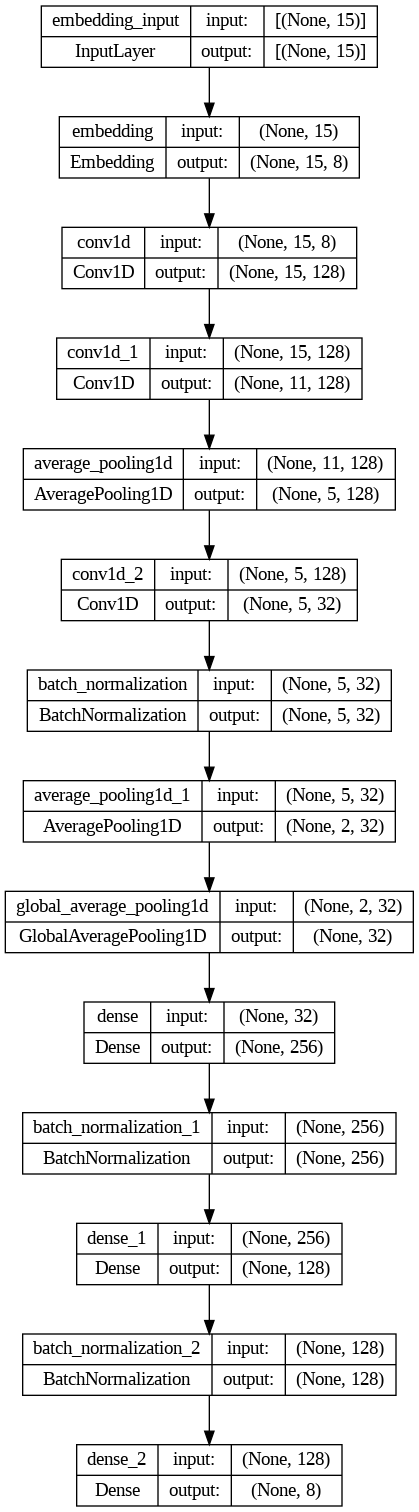

In [27]:
keras.utils.plot_model(model, show_shapes=True)

In [28]:
history = model.fit(X_train, y_train, 
          epochs=100, 
          batch_size=16, 
          validation_data=(X_test, y_test))

Epoch 1/100
67/67 [==============================] - 3s 19ms/step - loss: 1.1034 - accuracy: 0.6230 - val_loss: 1.9905 - val_accuracy: 0.3346
Epoch 2/100
67/67 [==============================] - 1s 12ms/step - loss: 0.7971 - accuracy: 0.7069 - val_loss: 2.0615 - val_accuracy: 0.3346
Epoch 3/100
67/67 [==============================] - 1s 8ms/step - loss: 0.7109 - accuracy: 0.7342 - val_loss: 2.0891 - val_accuracy: 0.3346
Epoch 4/100
67/67 [==============================] - 0s 7ms/step - loss: 0.6584 - accuracy: 0.7446 - val_loss: 2.0221 - val_accuracy: 0.3346
Epoch 5/100
67/67 [==============================] - 0s 7ms/step - loss: 0.6336 - accuracy: 0.7484 - val_loss: 2.0434 - val_accuracy: 0.3346
Epoch 6/100
67/67 [==============================] - 1s 11ms/step - loss: 0.5791 - accuracy: 0.7474 - val_loss: 2.0939 - val_accuracy: 0.3346
Epoch 7/100
67/67 [==============================] - 1s 14ms/step - loss: 0.5816 - accuracy: 0.7587 - val_loss: 1.7752 - val_accuracy: 0.3346
Epoch 8/1

17/17 [==============================] - 0s 2ms/step
train-acc = 0.824693685202639
test-acc = 0.722753346080306


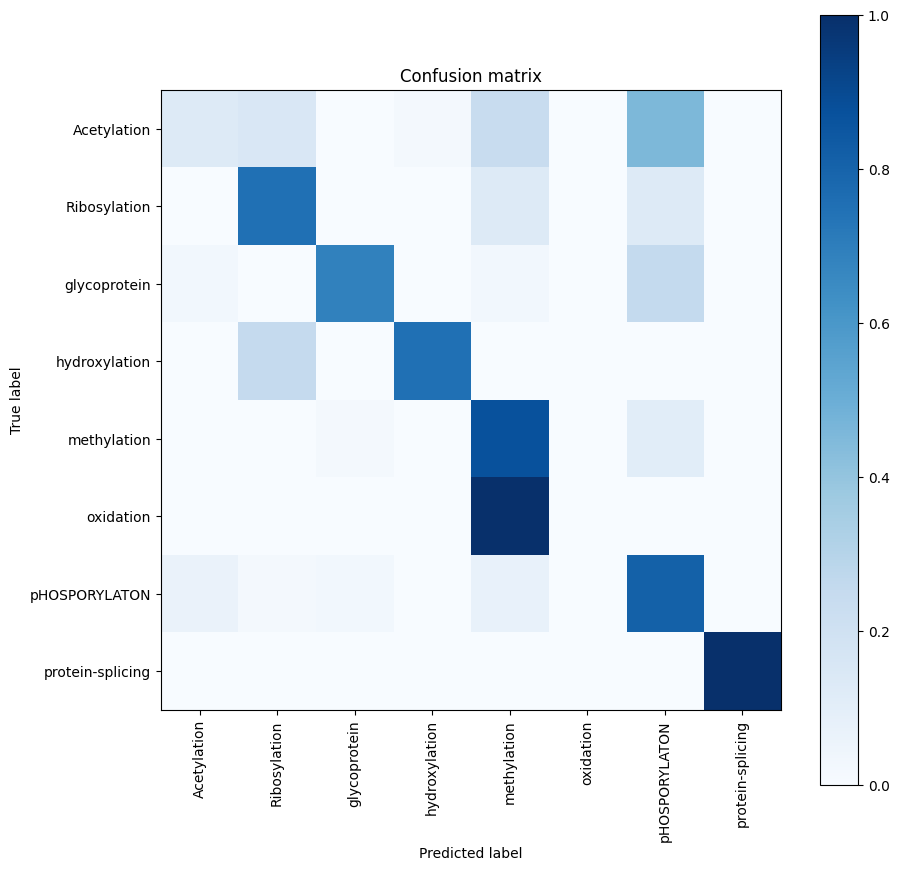

                  precision    recall  f1-score   support

     Acetylation       0.33      0.13      0.19        46
    Ribosylation       0.33      0.75      0.46         8
    glycoprotein       0.77      0.69      0.73        35
   hydroxylation       0.75      0.75      0.75         4
     methylation       0.56      0.87      0.68       103
       oxidation       0.00      0.00      0.00        45
   pHOSPORYLATON       0.77      0.81      0.79       175
protein-splicing       1.00      1.00      1.00       107

        accuracy                           0.72       523
       macro avg       0.57      0.63      0.57       523
    weighted avg       0.66      0.72      0.68       523



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("train-acc = " + str(accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))))
print("test-acc = " + str(accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))))

# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
#for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), target_names=lb.classes_))


### Pickling Model

In [30]:
# loading library
import pickle

In [32]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1576,10,5,13,1,3,5,20,2,1,4,1,9,18,6,3
249,5,6,12,17,15,7,10,2,1,7,7,5,14,19,11
179,9,1,14,4,1,1,16,2,2,2,9,7,14,13,11
787,5,5,6,5,11,6,5,2,3,6,12,5,15,6,4
857,1,10,1,6,4,8,15,2,1,12,5,4,4,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,11,10,1,15,1,2,2,2,12,15,1,6,1,10,1
994,6,4,3,7,11,7,11,2,5,18,17,12,13,1,2
1219,1,18,3,8,17,2,8,2,6,2,8,6,1,1,9
398,11,13,4,17,4,3,12,2,4,10,8,8,2,16,1


In [33]:
from joblib import Parallel, delayed
import joblib
  
  
# Save the model as a pickle in a file
joblib.dump(model, 'model.pkl')
  
# Load the model from the file
cnn_from_joblib = joblib.load('model.pkl')
  
# Use the loaded model to make predictions
cnn_from_joblib.predict(X_test)

17/17 [==============================] - 0s 2ms/step


array([[3.52e-07, 2.14e-06, 7.55e-06, ..., 1.41e-06, 1.80e-05, 1.00e+00],
       [3.10e-01, 3.53e-05, 3.43e-04, ..., 2.84e-01, 3.84e-04, 2.31e-05],
       [5.34e-05, 1.60e-05, 1.02e-04, ..., 1.57e-06, 1.89e-02, 2.86e-08],
       ...,
       [2.65e-01, 3.02e-04, 7.05e-04, ..., 5.81e-04, 7.22e-01, 6.73e-05],
       [4.36e-04, 5.48e-05, 2.83e-05, ..., 3.53e-04, 2.88e-05, 2.21e-06],
       [1.34e-01, 1.60e-03, 9.59e-04, ..., 2.73e-03, 8.51e-01, 2.21e-04]],
      dtype=float32)

## ANN

In [34]:
in_dim = 15

model = Sequential()
model.add(Dense(8, input_dim = in_dim, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(8, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 90, batch_size = 16)
scores = model.evaluate(X_test, y_test)

for i, m in enumerate(model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))

Epoch 1/90
67/67 [==============================] - 1s 1ms/step - loss: 2.6074 - accuracy: 0.3252
Epoch 2/90
67/67 [==============================] - 0s 1ms/step - loss: 1.7178 - accuracy: 0.4336
Epoch 3/90
67/67 [==============================] - 0s 1ms/step - loss: 1.5013 - accuracy: 0.5636
Epoch 4/90
67/67 [==============================] - 0s 2ms/step - loss: 1.3001 - accuracy: 0.6268
Epoch 5/90
67/67 [==============================] - 0s 1ms/step - loss: 1.1667 - accuracy: 0.6324
Epoch 6/90
67/67 [==============================] - 0s 1ms/step - loss: 1.0875 - accuracy: 0.6428
Epoch 7/90
67/67 [==============================] - 0s 1ms/step - loss: 1.0443 - accuracy: 0.6447
Epoch 8/90
67/67 [==============================] - 0s 1ms/step - loss: 1.0068 - accuracy: 0.6484
Epoch 9/90
67/67 [==============================] - 0s 1ms/step - loss: 0.9818 - accuracy: 0.6579
Epoch 10/90
67/67 [==============================] - 0s 1ms/step - loss: 0.9619 - accuracy: 0.6494
Epoch 11/90
67/67 [

17/17 [==============================] - 0s 1ms/step
train-acc = 0.7521206409048068
test-acc = 0.6692160611854685


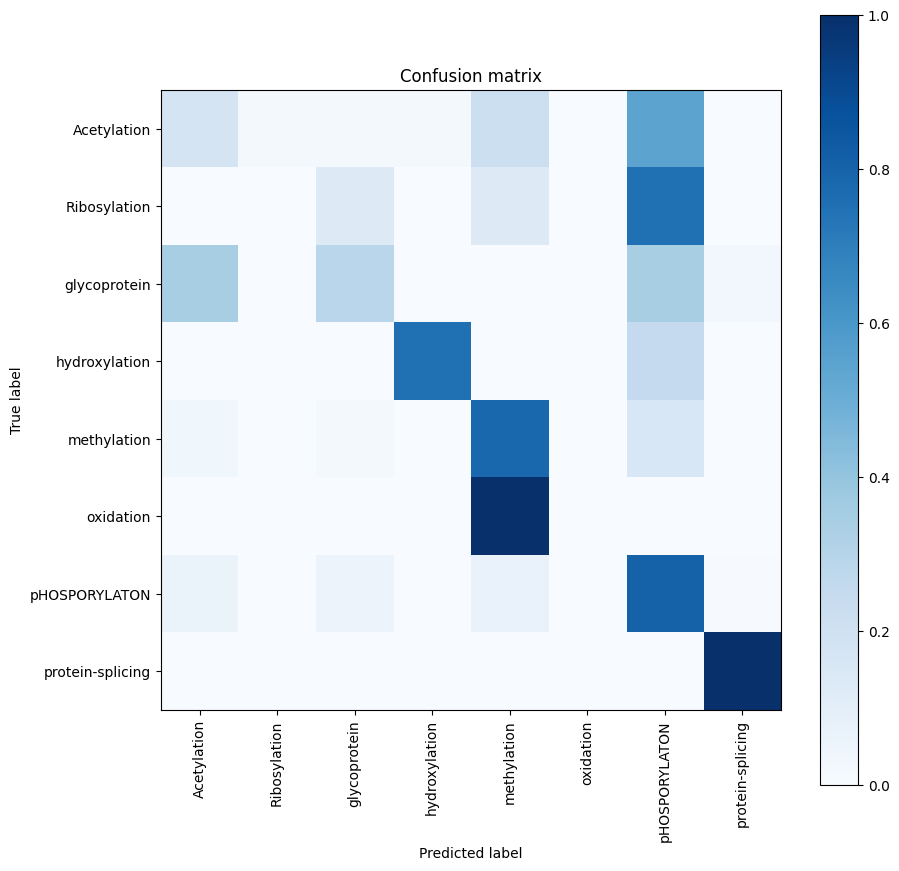

                  precision    recall  f1-score   support

     Acetylation       0.23      0.17      0.20        46
    Ribosylation       0.00      0.00      0.00         8
    glycoprotein       0.42      0.29      0.34        35
   hydroxylation       0.75      0.75      0.75         4
     methylation       0.54      0.79      0.64       103
       oxidation       0.00      0.00      0.00        45
   pHOSPORYLATON       0.70      0.81      0.75       175
protein-splicing       0.98      1.00      0.99       107

        accuracy                           0.67       523
       macro avg       0.45      0.48      0.46       523
    weighted avg       0.60      0.67      0.63       523



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("train-acc = " + str(accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))))
print("test-acc = " + str(accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))))

# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
#for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), target_names=lb.classes_))


## LSTM

In [36]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=15))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(8, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())
history = model.fit(X_train, y_train, epochs=100, batch_size=16,validation_split=0.2, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 8)             168       
                                                                 
 spatial_dropout1d (SpatialD  (None, 15, 8)            0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                18688     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
Total params: 19,376
Trainable params: 19,376
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
53/53 [==============================] - 3s 16ms/step - loss: 1.8635 - acc: 0.3420 - val_loss: 1.68

17/17 [==============================] - 0s 3ms/step
train-acc = 0.7813383600377003
test-acc = 0.7284894837476099


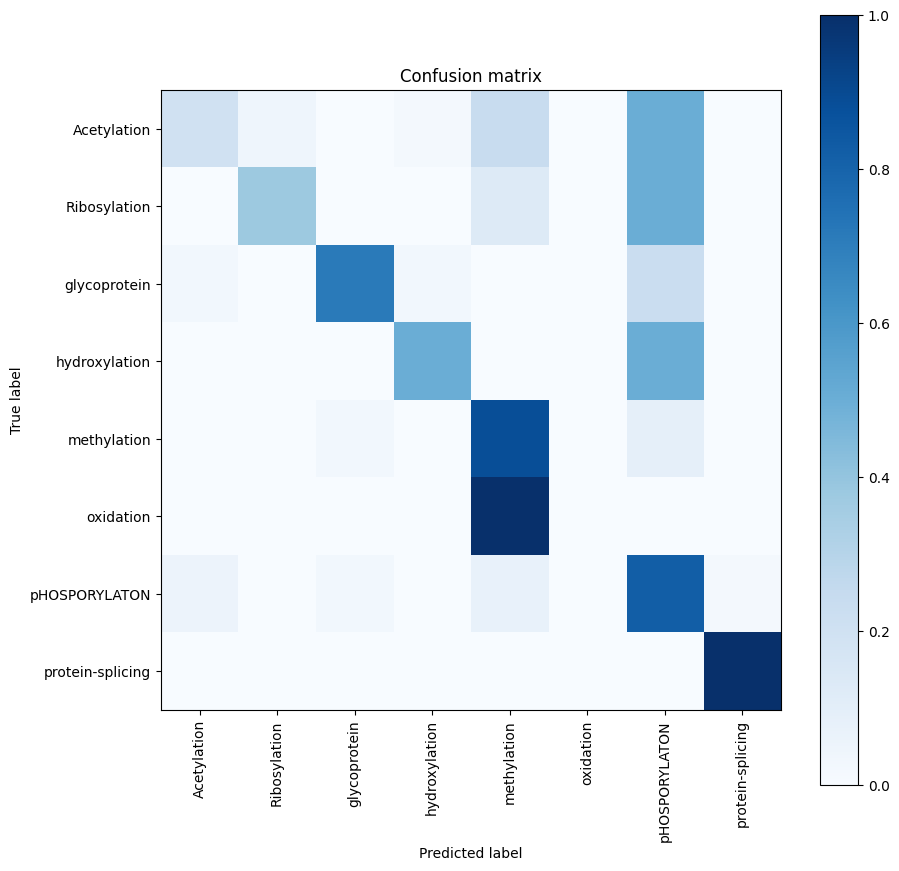

                  precision    recall  f1-score   support

     Acetylation       0.45      0.20      0.27        46
    Ribosylation       0.60      0.38      0.46         8
    glycoprotein       0.76      0.71      0.74        35
   hydroxylation       0.50      0.50      0.50         4
     methylation       0.57      0.88      0.69       103
       oxidation       0.00      0.00      0.00        45
   pHOSPORYLATON       0.76      0.82      0.79       175
protein-splicing       0.97      1.00      0.99       107

        accuracy                           0.73       523
       macro avg       0.58      0.56      0.55       523
    weighted avg       0.67      0.73      0.69       523



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("train-acc = " + str(accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))))
print("test-acc = " + str(accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))))

# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
#for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), target_names=lb.classes_))


## Logistic Regression

In [38]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [39]:
a = df['Modification'].unique()
# print(a)
d = {k: v for v, k in enumerate(a)}
d

{'Acetylation': 0,
 'hydroxylation': 1,
 'methylation': 2,
 'glycoprotein': 3,
 'oxidation': 4,
 'pHOSPORYLATON': 5,
 'Ribosylation': 6,
 'protein-splicing': 7}

In [40]:
y = np.array(df['Modification'].map(d))
y.shape

(1584,)

In [41]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.33, random_state = 200, shuffle=True)

In [42]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [43]:
lm.score(X_test, y_test)

0.6673040152963671